In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

path = "/content/drive/My Drive/Colab Notebooks/VanHome_AddFeature.csv"
#taban path : path = "/content/drive/My Drive/VanHome_AddFeature.csv"

dataset = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178610 entries, 0 to 178609
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ML #             178610 non-null  object 
 1   Address          178610 non-null  object 
 2   Price            178610 non-null  int64  
 3   List Date        178610 non-null  object 
 4   List Duration    178610 non-null  int64  
 5   Total Bedrooms   178610 non-null  int64  
 6   Total Bathrooms  178610 non-null  float64
 7   Total Area       178610 non-null  int64  
 8   Age              178610 non-null  float64
 9   Frontage         178610 non-null  float64
 10  Total Kitchens   178610 non-null  int64  
 11  City             178610 non-null  object 
 12  ifPendemic       178610 non-null  int64  
 13  ifAdditionalTax  178610 non-null  int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 19.1+ MB


In [ ]:
dataset.columns

Index(['ML #', 'Address', 'Price', 'List Date', 'List Duration',
       'Total Bedrooms', 'Total Bathrooms', 'Total Area', 'Age', 'Frontage',
       'Total Kitchens', 'City', 'ifPendemic', 'ifAdditionalTax'],
      dtype='object')

In [ ]:
#dataset['Style of Home'].nunique() #164
#dataset['TypeDwel'].nunique() #7 +nan

In [ ]:
#dataset['TypeDwel'].unique()

In [ ]:
dataset=dataset.loc[:, ['ML #', 'Address', 'Price', 'List Date', 'List Duration',
       'Total Bedrooms', 'Total Bathrooms', 'Total Area', 'Age', 'Frontage',
       'Total Kitchens', 'City', 'ifPendemic', 'ifAdditionalTax']]

In [ ]:
dataset.head()

,ML #,Address,Price,List Date,List Duration,Total Bedrooms,Total Bathrooms,Total Area,Age,Frontage,Total Kitchens,City,ifPendemic,ifAdditionalTax
0,V669393,4263 NAPIER STREET,61700,2007-09-17,2,3,2.0,1340,60.000000,50.0,1,Burnaby,0,0
1,V357072,6396 ARBROATH STREET,172800,2003-08-26,95,2,1.0,1200,37.580899,33.0,1,Burnaby,0,0
2,V323545,7408 17TH AVENUE,187000,2003-01-24,99,2,1.0,700,48.000000,66.0,1,Burnaby,0,0
3,V404041,205 3978 ALBERT STREET,189500,2004-06-07,2,2,2.0,943,9.000000,0.0,1,Burnaby,0,0
4,V314537,9922 SULLIVAN STREET,190000,2002-10-26,21,2,1.0,1354,37.580899,71.0,1,Burnaby,0,0


In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
 #initialize Nominatim API 
geolocator = Nominatim(user_agent="geoapiExercises")

In [ ]:
place = "1525 COAL HARBOUR QUAY, Vancouver, Canada"
location = geolocator.geocode(place)
print(location)

Coal Harbour Quay, Coal Harbour, Downtown, Vancouver, Metro Vancouver Regional District, British Columbia, V6G, Canada


In [ ]:
#dataset['geo_address'] = dataset.Address + ", Vancouver, Canada"

In [ ]:
#dataset['address_f']=dataset.geo_address.apply(geolocator.geocode)

In [ ]:
#dataset['address_f']

#EDA

In [ ]:
dataset['Age'].dtype

dtype('float64')

In [ ]:
dataset.shape

(178610, 14)

In [ ]:
2597/66000*100

3.9348484848484846

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


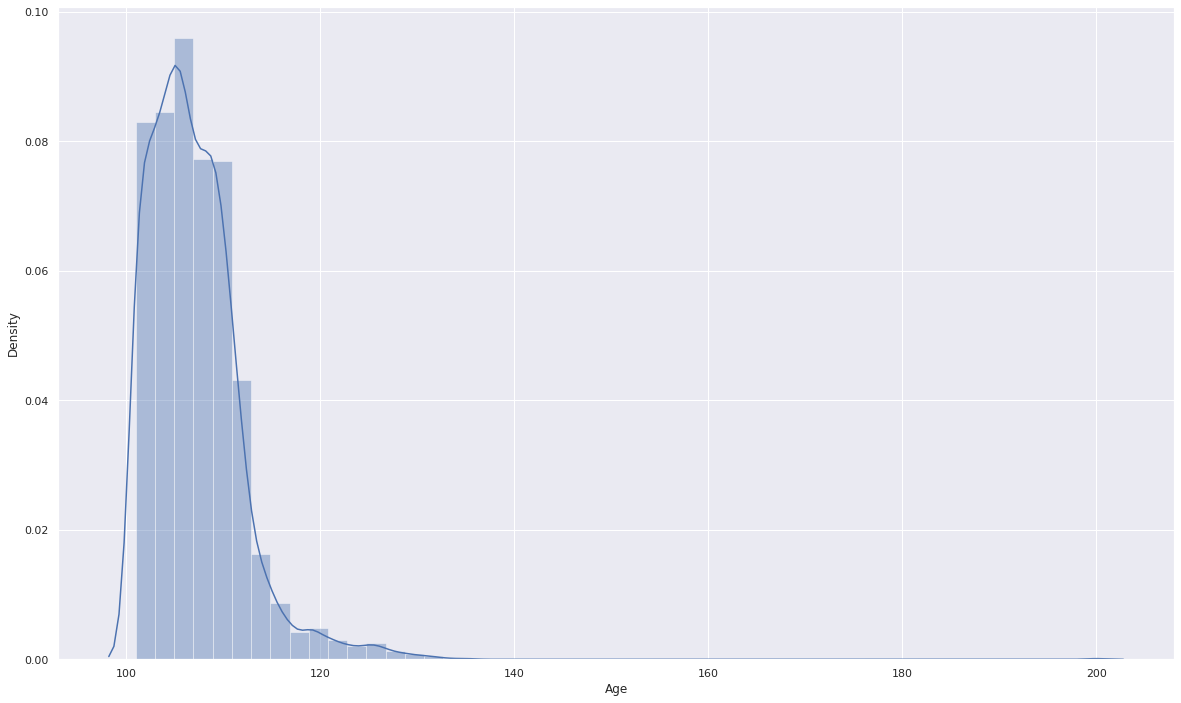

In [ ]:
import seaborn as sns
df_sns=dataset[dataset['Age']>100]
sns.distplot(df_sns['Age'])

In [ ]:
#df_sns['Yr Blt'].unique()

In [ ]:
#dataset[dataset['Yr Blt']==9999]=1999
#dataset[dataset['Yr Blt']==9990]=1990
#dataset[dataset['Yr Blt']==9992]=1992
#dataset[dataset['Yr Blt']==9996]=1996
#dataset[dataset['Yr Blt']==9998]=1998

In [ ]:
#dataset['Price'] = dataset['Price'].astype(float)
#df['column_name'] = pd.to_numeric(df['column_name'])
dataset['Price'] = dataset['Price'].replace('[\$,]', '', regex=True).astype(float)

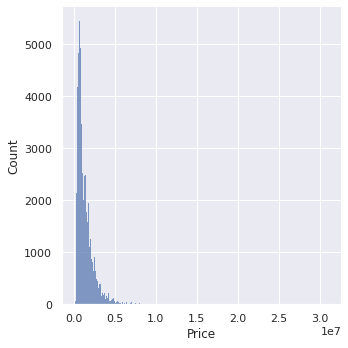

In [ ]:
sns.displot(dataset['Price'])

In [ ]:
null_columns=dataset.columns[dataset.isnull().any()]
dataset[null_columns].isnull().sum()

Series([], dtype: float64)

In [ ]:
dataset.Age.unique

<bound method Series.unique of 0         60.000000
1         37.580899
2         48.000000
3          9.000000
4         37.580899
            ...    
178605     0.000000
178606    36.135407
178607     1.000000
178608     1.000000
178609    77.000000
Name: Age, Length: 178610, dtype: float64>

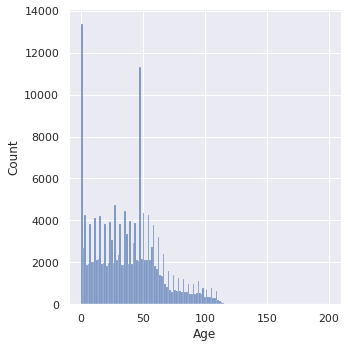

In [ ]:
sns.displot(dataset['Age'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


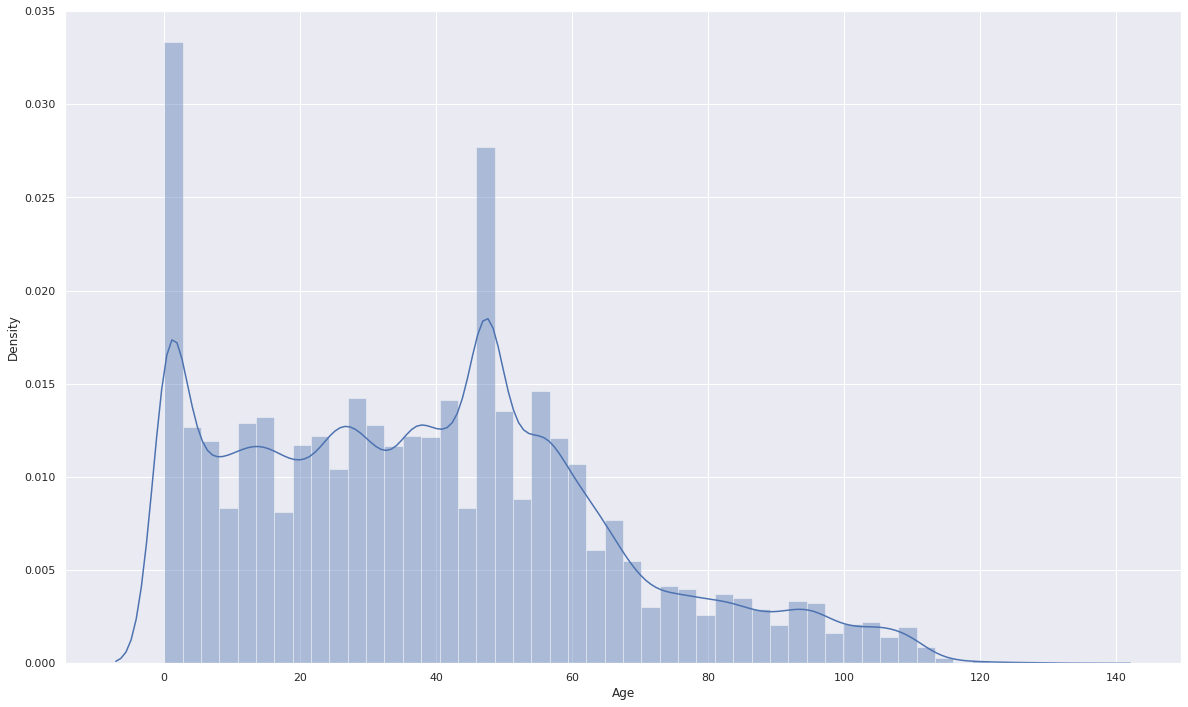

In [ ]:
df_sns=dataset[dataset['Age']<150]
sns.distplot(df_sns['Age'])

In [ ]:
dataset=dataset[dataset["Age"]<150]

In [ ]:
#import missingno as msno
#msno.matrix(dataset)

In [ ]:
#dataset = dataset.drop('Yr Blt', axis=1)

In [ ]:
dataset.shape

(178609, 14)

In [ ]:
df = dataset.dropna()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178609 entries, 0 to 178609
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ML #             178609 non-null  object 
 1   Address          178609 non-null  object 
 2   Price            178609 non-null  float64
 3   List Date        178609 non-null  object 
 4   List Duration    178609 non-null  int64  
 5   Total Bedrooms   178609 non-null  int64  
 6   Total Bathrooms  178609 non-null  float64
 7   Total Area       178609 non-null  int64  
 8   Age              178609 non-null  float64
 9   Frontage         178609 non-null  float64
 10  Total Kitchens   178609 non-null  int64  
 11  City             178609 non-null  object 
 12  ifPendemic       178609 non-null  int64  
 13  ifAdditionalTax  178609 non-null  int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 20.4+ MB


In [ ]:
df.shape

(178609, 14)

In [ ]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [ ]:
df.head()

,ML #,Address,Price,List Date,List Duration,Total Bedrooms,Total Bathrooms,Total Area,Age,Frontage,Total Kitchens,City,ifPendemic,ifAdditionalTax
0,V669393,4263 NAPIER STREET,61700.0,2007-09-17,2,3,2.0,1340,60.000000,50.0,1,Burnaby,0,0
1,V357072,6396 ARBROATH STREET,172800.0,2003-08-26,95,2,1.0,1200,37.580899,33.0,1,Burnaby,0,0
2,V323545,7408 17TH AVENUE,187000.0,2003-01-24,99,2,1.0,700,48.000000,66.0,1,Burnaby,0,0
3,V404041,205 3978 ALBERT STREET,189500.0,2004-06-07,2,2,2.0,943,9.000000,0.0,1,Burnaby,0,0
4,V314537,9922 SULLIVAN STREET,190000.0,2002-10-26,21,2,1.0,1354,37.580899,71.0,1,Burnaby,0,0


In [ ]:
df = df.drop(['Address','List Date'] ,axis=1)

In [ ]:
#df['TypeDwel'].value_counts()

In [ ]:
#df.loc[ df.TypeDwel=="HACR", "TypeDwel"] = 'OTHER'
#df.loc[ df.TypeDwel=="TWNHS", "TypeDwel"] = 'OTHER'
#df.loc[ df.TypeDwel=="RECRE", "TypeDwel"] = 'OTHER'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178609 entries, 0 to 178609
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ML #             178609 non-null  object 
 1   Price            178609 non-null  float64
 2   List Duration    178609 non-null  int64  
 3   Total Bedrooms   178609 non-null  int64  
 4   Total Bathrooms  178609 non-null  float64
 5   Total Area       178609 non-null  int64  
 6   Age              178609 non-null  float64
 7   Frontage         178609 non-null  float64
 8   Total Kitchens   178609 non-null  int64  
 9   City             178609 non-null  object 
 10  ifPendemic       178609 non-null  int64  
 11  ifAdditionalTax  178609 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 17.7+ MB


In [ ]:
#df['TotFlArea'] = df['TotFlArea'].replace('[\,,]', '', regex=True).astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178609 entries, 0 to 178609
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ML #             178609 non-null  object 
 1   Price            178609 non-null  float64
 2   List Duration    178609 non-null  int64  
 3   Total Bedrooms   178609 non-null  int64  
 4   Total Bathrooms  178609 non-null  float64
 5   Total Area       178609 non-null  int64  
 6   Age              178609 non-null  float64
 7   Frontage         178609 non-null  float64
 8   Total Kitchens   178609 non-null  int64  
 9   City             178609 non-null  object 
 10  ifPendemic       178609 non-null  int64  
 11  ifAdditionalTax  178609 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 17.7+ MB


In [ ]:
#df['Frontage'] = df['Frontage'].replace('[\,,]', '', regex=True).astype(float)

In [ ]:
cat = []

for i in df.columns:
    if df[i].dtype == 'O':
        cat.append(i)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat:
    print("Encoding",i)
    df[i] = le.fit_transform(df[i])

Encoding ML #
Encoding City


In [ ]:
df.head()

,ML #,Price,List Duration,Total Bedrooms,Total Bathrooms,Total Area,Age,Frontage,Total Kitchens,City,ifPendemic,ifAdditionalTax
0,133551,61700.0,2,3,2.0,1340,60.000000,50.0,1,0,0,0
1,89310,172800.0,95,2,1.0,1200,37.580899,33.0,1,0,0,0
2,80813,187000.0,99,2,1.0,700,48.000000,66.0,1,0,0,0
3,99264,189500.0,2,2,2.0,943,9.000000,0.0,1,0,0,0
4,78778,190000.0,21,2,1.0,1354,37.580899,71.0,1,0,0,0


In [ ]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/data.csv', index = False)

Train Test Split 

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

## Splitting data

from sklearn.model_selection import train_test_split

X=df.drop(columns=['Price'],axis=1)
y =df['Price']

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(125026, 11)
(125026,)
(53583, 11)
(53583,)


## Linear Regression 

In [ ]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Train score: {:.4f} %'.format(lreg.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(lreg.score(X_test, y_test)*100))

Train score: 53.7072 %
Test score: 54.1636 %


Cross Validation for linear regression

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
lin_reg = LinearRegression()
scores_train = cross_val_score(lin_reg, X_train, y_train)
scores_test = cross_val_predict(lin_reg, X_test, y_test)
print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))

Cross-validation scores_train: [0.54531752 0.54140116 0.53513418 0.51489882 0.54675093]
Cross-validation scores_test: [1563675.33595847  986445.46115961  787379.1910956  ... 1657016.38988911
  490078.99104652  724849.33059634]


## KNN

Text(0, 0.5, 'Score')

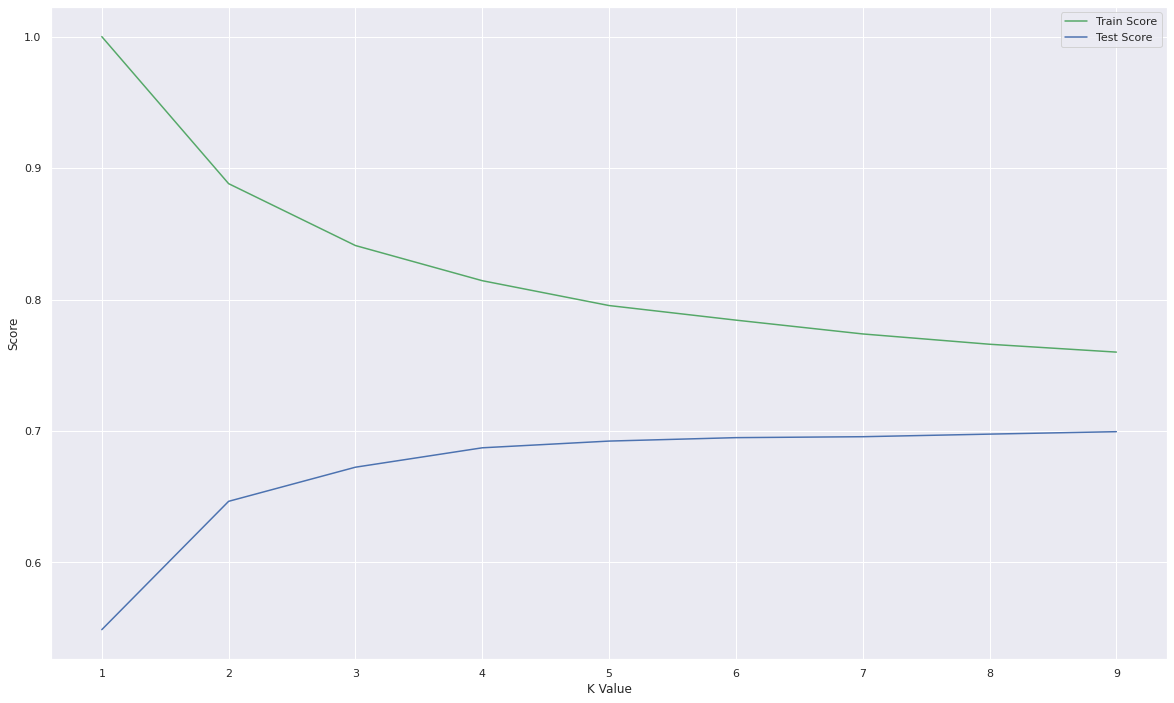

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,12)})

train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend() 
plt.xlabel('K Value')
plt.ylabel('Score')

## Decision trees

Text(0, 0.5, 'Scores')

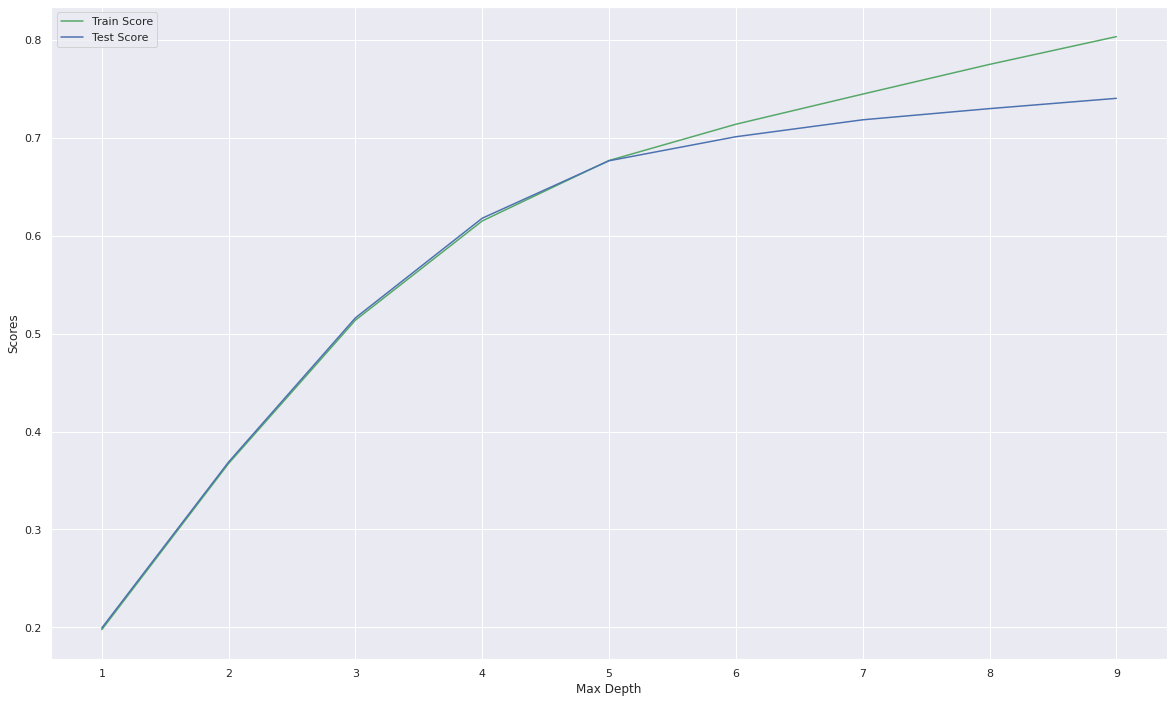

In [ ]:
from sklearn.tree import DecisionTreeRegressor

sns.set(rc={'figure.figsize':(20,12)})


train_score_array = []
test_score_array = []

for n in range(1,10):
    tree = DecisionTreeRegressor(max_depth=n)
    tree.fit(X_train, y_train)
    train_score_array.append(tree.score(X_train, y_train))
    test_score_array.append(tree.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Scores')

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_train, y_train)

y_pred=tree.predict(X_test)

print('Train score: {:.4f} %'.format(tree.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(tree.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('r2_score :', tree.score(X_test,y_test))

Train score: 61.5014 %
Test score: 61.7807 %
RMSE: 706666.3614
r2_score : 0.6178067362851013


## xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
xg_reg = XGBRegressor()

xg_reg.fit(X_train,y_train)

xg_preds = xg_reg.predict(X_test)

print('Train score: {:.4f} %'.format(xg_reg.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(xg_reg.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,xg_preds))))
print('r2_score :', xg_reg.score(X_test,y_test))

[23:13:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 78.0974 %
Test score: 77.0353 %
RMSE: 547776.5107
r2_score : 0.7703528809222813


In [ ]:
xg_preds.predict([89310, 95, 2, 1,
       1200, 37, 33.0, 1,
      0, 0, 0])


array([10055670.], dtype=float32)

In [ ]:
print(xg_reg.predict([[133551, 2, 2, 1, 400, 37.58, 33, 1, 2, 0, 0]])*0.1)

[1200917.4]


In [ ]:
X_test[10]

array([7.21411601e-01, 4.03458213e-03, 2.85714286e-01, 1.66666667e-01,
       2.23272091e-02, 5.92592593e-02, 4.68300249e-04, 2.00000000e-01,
       8.75000000e-01, 0.00000000e+00, 0.00000000e+00])

In [ ]:
X.head()

,ML #,List Duration,Total Bedrooms,Total Bathrooms,Total Area,Age,Frontage,Total Kitchens,City,ifPendemic,ifAdditionalTax
0,133551,2,3,2.0,1340,60.000000,50.0,1,0,0,0
1,89310,95,2,1.0,1200,37.580899,33.0,1,0,0,0
2,80813,99,2,1.0,700,48.000000,66.0,1,0,0,0
3,99264,2,2,2.0,943,9.000000,0.0,1,0,0,0
4,78778,21,2,1.0,1354,37.580899,71.0,1,0,0,0


In [ ]:
from sklearn.model_selection import RepeatedKFold

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(xg_reg, X, y, cv=cv, n_jobs=-1)


In [ ]:
scores

array([-275857.51193592, -281151.0684439 , -283599.26106286,
       -280863.44962663, -277837.42651762, -284056.97733452,
       -280218.57498618, -285588.74759952, -280517.46950321,
       -276462.35555974, -273854.04356559, -283497.52094866,
       -280889.71013836, -274786.99115391, -278939.78786795,
       -283898.16815618, -285035.43327116, -285366.58576866,
       -283888.59006223, -280087.10034601, -285299.00042341,
       -276696.48669369, -281597.79090616, -283279.7122156 ,
       -282900.0835169 , -283500.64163453, -281201.86165607,
       -281010.44908665, -277128.24904996, -282442.42131028])

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
scores_test = cross_val_predict(xg_reg, X_test, y_test)
print("Cross-validation scores_test: {}".format(scores_test))

[23:17:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:17:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:17:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:17:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:17:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross-validation scores_test: [1419947.4   770743.25  941952.3  ... 1768634.8   430461.88  620675.56]


## DT CV

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
tree1 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=3)
scores_train = cross_val_score(tree1, X_train, y_train)
scores_test = cross_val_predict(tree1, X_test, y_test)
print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))

Cross-validation scores_train: [0.62293    0.61366153 0.60977696 0.59060043 0.61496491]
Cross-validation scores_test: [1568452.01151734  760843.28000723  760843.28000723 ...  762822.87023035
  462094.68244406  638347.35828488]


## Saving the model 

## Pickle Models

In [ ]:
import pickle

# Save the model under the cwd
pkl_filename = "/content/drive/My Drive/xg_reg.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(xg_reg, file)
#"/content/drive/My Drive/VanHome_AddFeature.csv"

# Load the saved model
with open("/content/drive/My Drive/xg_reg.pkl", 'rb') as file:
    xg_reg = pickle.load(file)
 
 
# Now you can use the model
print("The prediction price is", xg_reg.predict([[3999, 0, 0, 0, 0, 0 ,0 ,0 ,0 ,1 ,0 ]]))

[21:46:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The prediction price is [1049742.5]


## Joblib Models

In [ ]:
import joblib
 
# Save the model under the cwd
joblib_filename = "/content/drive/My Drive/xg_reg.pkl"
joblib.dump(xg_reg, joblib_filename )
 
# Load the saved model
xg_reg = joblib.load('/content/drive/My Drive/xg_reg.pkl')
 
# Now you can use the model
print(xg_reg.predict([[3999, 0, 0, 0, 0, 0 ,0 ,0 ,0 ,1 ,0 ]]))

[21:52:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1049742.5]
